In [5]:
## import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from ucimlrepo import fetch_ucirepo
 

In [6]:
# no module named 'ucimlrepo'
!pip install ucimlrepo

In [15]:
# load the dataset
air_quality=fetch_ucirepo(id=360)


In [16]:
air_quality

{'data': {'ids': None,
  'features':            Date      Time  CO(GT)  PT08.S1(CO)  ...  PT08.S5(O3)     T    RH      AH
  0     3/10/2004  18:00:00     2.6         1360  ...         1268  13.6  48.9  0.7578
  1     3/10/2004  19:00:00     2.0         1292  ...          972  13.3  47.7  0.7255
  2     3/10/2004  20:00:00     2.2         1402  ...         1074  11.9  54.0  0.7502
  3     3/10/2004  21:00:00     2.2         1376  ...         1203  11.0  60.0  0.7867
  4     3/10/2004  22:00:00     1.6         1272  ...         1110  11.2  59.6  0.7888
  ...         ...       ...     ...          ...  ...          ...   ...   ...     ...
  9352   4/4/2005  10:00:00     3.1         1314  ...         1729  21.9  29.3  0.7568
  9353   4/4/2005  11:00:00     2.4         1163  ...         1269  24.3  23.7  0.7119
  9354   4/4/2005  12:00:00     2.4         1142  ...         1092  26.9  18.3  0.6406
  9355   4/4/2005  13:00:00     2.1         1003  ...          770  28.3  13.5  0.5139
  9356  

In [21]:
# convert into dataframe
df=air_quality.data.features

In [22]:
# select the specific columns for anomoly detection
features=df[['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']]



In [26]:
features.head()

,CO(GT),C6H6(GT),NOx(GT),NO2(GT)
0,2.6,11.9,166,113
1,2.0,9.4,103,92
2,2.2,9.0,131,114
3,2.2,9.2,172,122
4,1.6,6.5,131,116


In [23]:
features.isna().sum()

CO(GT)      0
C6H6(GT)    0
NOx(GT)     0
NO2(GT)     0
dtype: int64

In [25]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CO(GT)    9357 non-null   float64
 1   C6H6(GT)  9357 non-null   float64
 2   NOx(GT)   9357 non-null   int64  
 3   NO2(GT)   9357 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 292.5 KB


In [27]:
# parameters for isolation forest
n_estimators=100 # number of trees in the forest
contamination=0.1 # proportion of outliers in the data
sample_size=256 # number of samples to draw from the data to train each tree

In [28]:
# train the isolation forest model
model=IsolationForest(n_estimators=n_estimators, contamination=contamination, 
max_samples=sample_size, random_state=42)

model.fit(features)

#predict anomalies
anomaly_labels=model.predict(features)
# -1 for anomalies and 1 for normal data points

In [30]:
# create new column in the original dataframe to store anomaly labels
features['anomaly']=anomaly_labels
features.head()

C:\Users\aniru\AppData\Local\Temp\ipykernel_28596\659876822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['anomaly']=anomaly_labels


,CO(GT),C6H6(GT),NOx(GT),NO2(GT),anomaly
0,2.6,11.9,166,113,1
1,2.0,9.4,103,92,1
2,2.2,9.0,131,114,1
3,2.2,9.2,172,122,1
4,1.6,6.5,131,116,1


In [ ]:
features['anomaly'].value_counts()

anomaly
 1    8421
-1     936
Name: count, dtype: int64

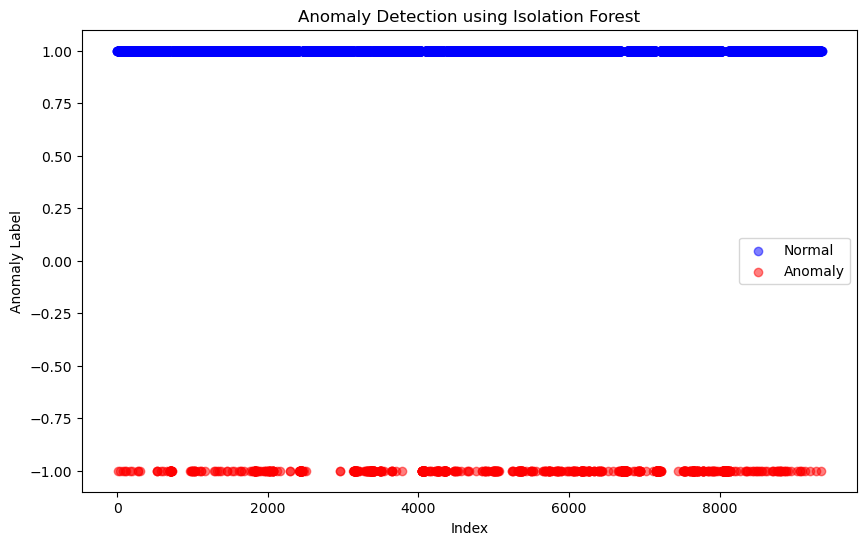

In [33]:
# visulalize the anomalies using scater plot
plt.figure(figsize=(10, 6))

# plot normal instances
normal_data=features[features['anomaly']==1]
plt.scatter(normal_data.index, normal_data['anomaly'], color='blue', label='Normal', alpha=0.5)

# plot anomalies
anomalies=features[features['anomaly']==-1]
plt.scatter(anomalies.index, anomalies['anomaly'], color='red', label='Anomaly', alpha=0.5)
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Anomaly Label')
plt.legend()
plt.show()